In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs
import statsmodels.api as sm
import math

In [2]:
Ad_data=pd.read_csv('D:/Stella/Documents/10_Academy/Week-2/AdSmartABdata.csv')
Ad_data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
data=Ad_data.copy()

In [4]:
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 8077 rows and 9 columns


In [6]:
#Total percent of missing values per column
def missing_per_column(df):
    print(round(df.isna().sum()))
missing_per_column(data)

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [24]:
#convert date column to date type
data['date'] =  pd.to_datetime(data['date'], format='%Y-%m-%d')

In [25]:
#check if auction id is unique
data['auction_id'].nunique()

8077

# Filter the dataset to get data on the people who responded

In [10]:
response=data[(data['yes']== 1) | (data['no']== 1)]
response.shape

(1243, 9)

# Filter the dataset to get data on people who did not respond

In [17]:
non_response=data[(data['yes']== 0) & (data['no']== 0)]
non_response.shape

(6834, 9)

# Get dataset of the exposed group out of the people that responded

In [125]:
#exposed_data=response[(response['experiment']== 'exposed')]
exposed_data=response[(response['experiment']== 'exposed')].reset_index()
exposed_data.head()

,index,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
1,16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
2,20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
3,39,013e45cf-e388-46a4-9c5b-a34303613940,exposed,2020-07-10,2,Generic Smartphone,6,Chrome Mobile,0,1
4,46,01905bae-fc59-475e-b2b4-09b78163c961,exposed,2020-07-05,6,I3312,6,Chrome Mobile WebView,0,1


# Get dataset of control group out of the people that responded

In [126]:
#control_data=response[(response['experiment']== 'control')]
control_data=response[(response['experiment']== 'control')].reset_index()

# Univariate Analysis of people who responded vs people who failed to respond

In [ ]:
#exposed_full_data=response[(response['experiment']== 'exposed')]

In [ ]:
#control_full_data=response[(response['experiment']== 'control')]

In [32]:
response.yes.value_counts()

0    671
1    572
Name: yes, dtype: int64

In [64]:
#Number of respondents in the control and exposed groups
#There are more respondents in the exposed group than control group
response.experiment.value_counts()

exposed    657
control    586
Name: experiment, dtype: int64

pivot table comparing the two groups of respondents

In [68]:
ab_summary = response.pivot_table(values='yes', index='experiment', aggfunc=np.sum)
# add additional columns to the pivot table
ab_summary['total'] = response.pivot_table(values='yes', index='experiment', aggfunc=lambda x: len(x))
ab_summary['rate'] = response.pivot_table(values='yes', index='experiment')
ab_summary

,yes,total,rate
experiment,,,
control,264,586,0.450512
exposed,308,657,0.468798


no of people who said yes v/s no among respondents

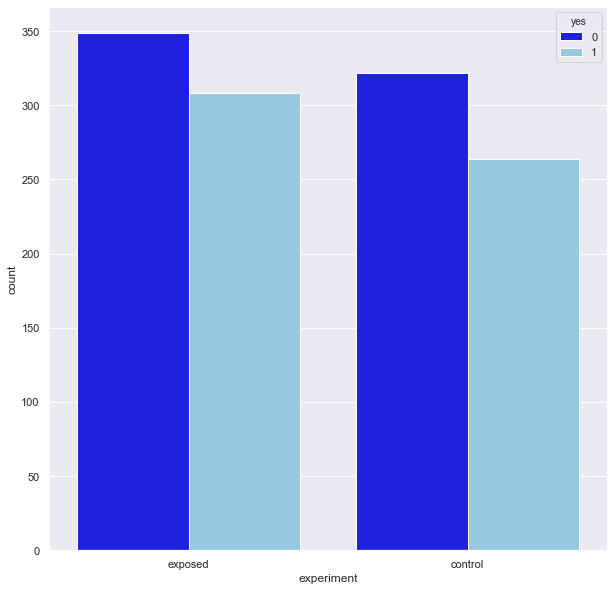

In [65]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="experiment", palette=["blue", "skyblue"], data=response, hue='yes')

bar plot of the responses per day
shows the number of people responding to the question for each day of the experiment

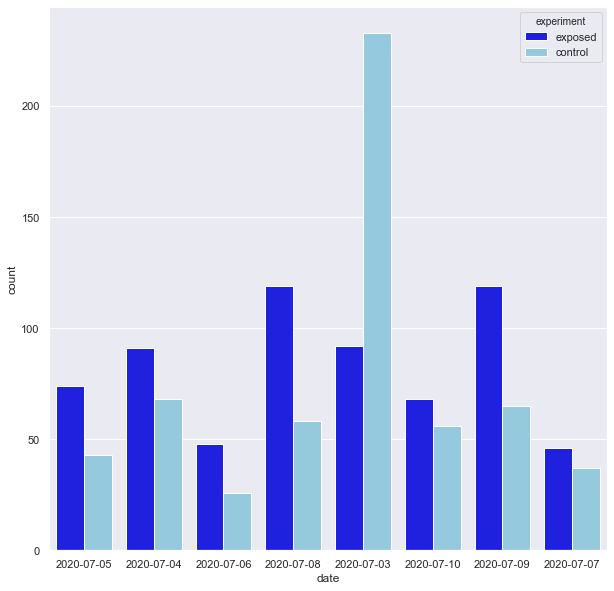

In [52]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="date", palette=["blue", "skyblue"], data=response, hue='experiment')


In [82]:
control_aware

264

bar plot of control vs experiment non-responses on the different days

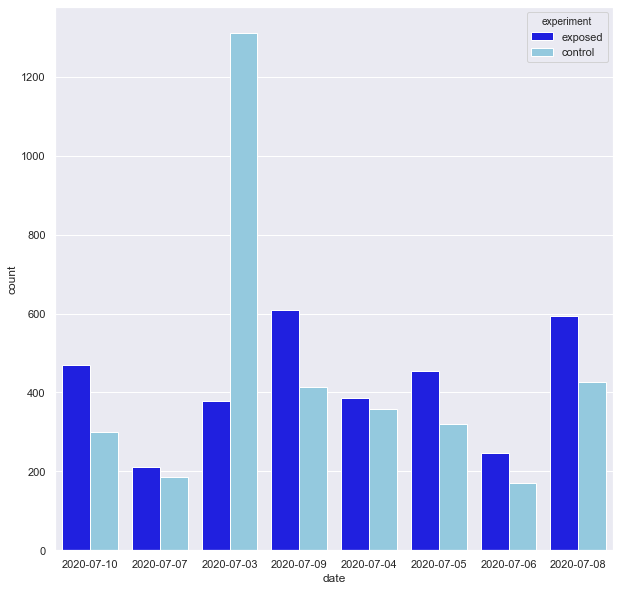

In [36]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="date", palette=["blue", "skyblue"], data=non_response, hue='experiment')

bar plot of when the responses were made
to determine which hour most people are online

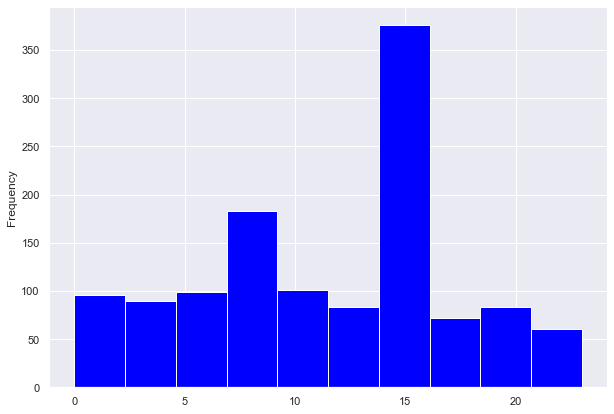

In [41]:
response.hour.plot(kind='hist', color='blue', figsize=(10,7))

Distribution of the hour the non-response was recorded

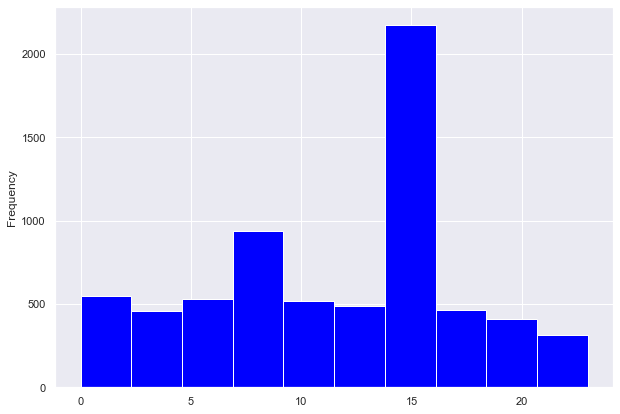

In [47]:
non_response.hour.plot(kind='hist', color='blue', figsize=(10,7))

response hour based on type of experiment

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="hour", palette=["blue", "skyblue"], data=response, hue='experiment')
plt.xticks(rotation=45)

non-respose hour based on experiment

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

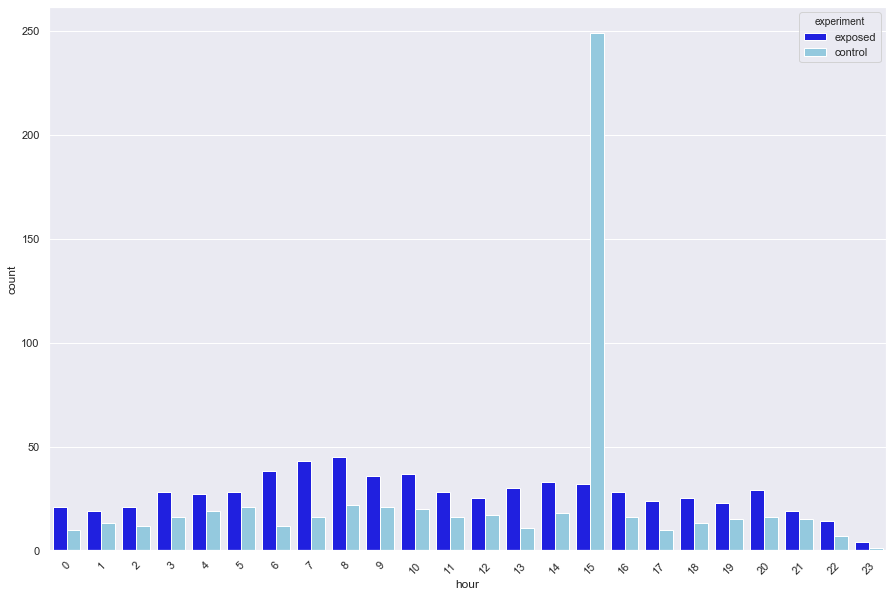

In [53]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="hour", palette=["blue", "skyblue"], data=non_response, hue='experiment')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

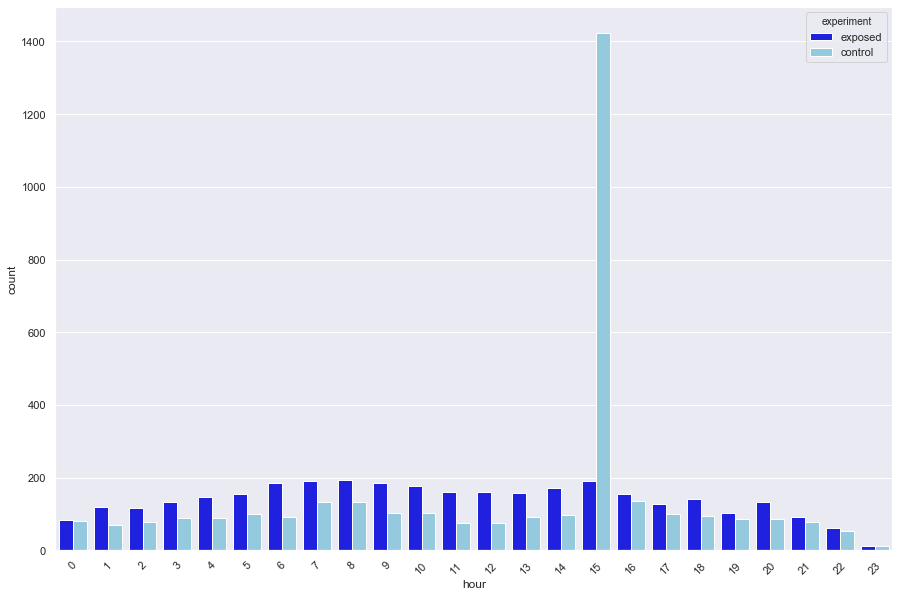

In [54]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="hour", palette=["blue", "skyblue"], data=non_response, hue='experiment')
plt.xticks(rotation=45)

Distribution of broswer for people who responded

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

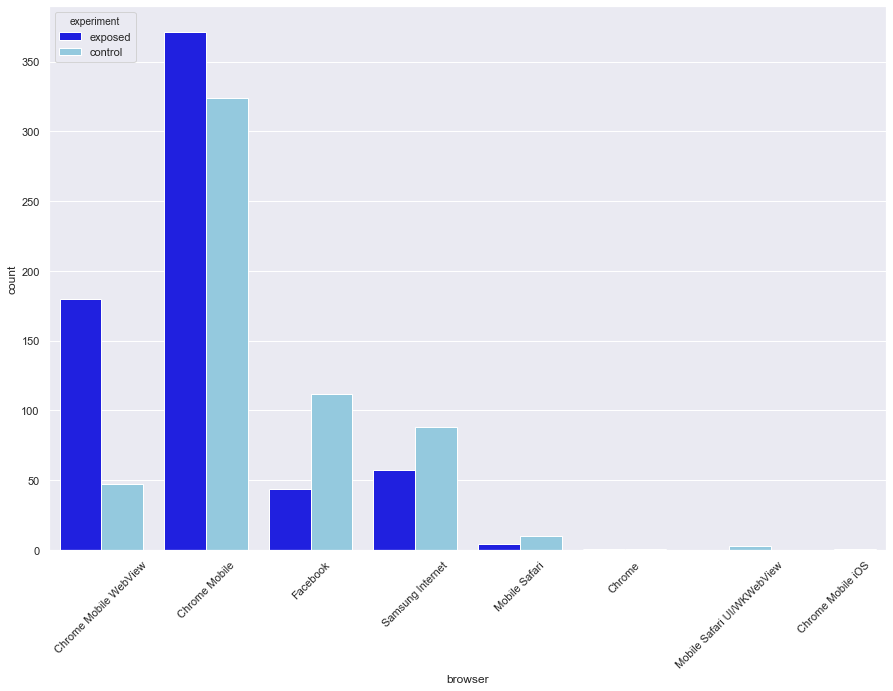

In [46]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="browser", palette=["blue", "skyblue"], data=response, hue='experiment')
plt.xticks(rotation=45)

Distribution of broswer for non-response

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

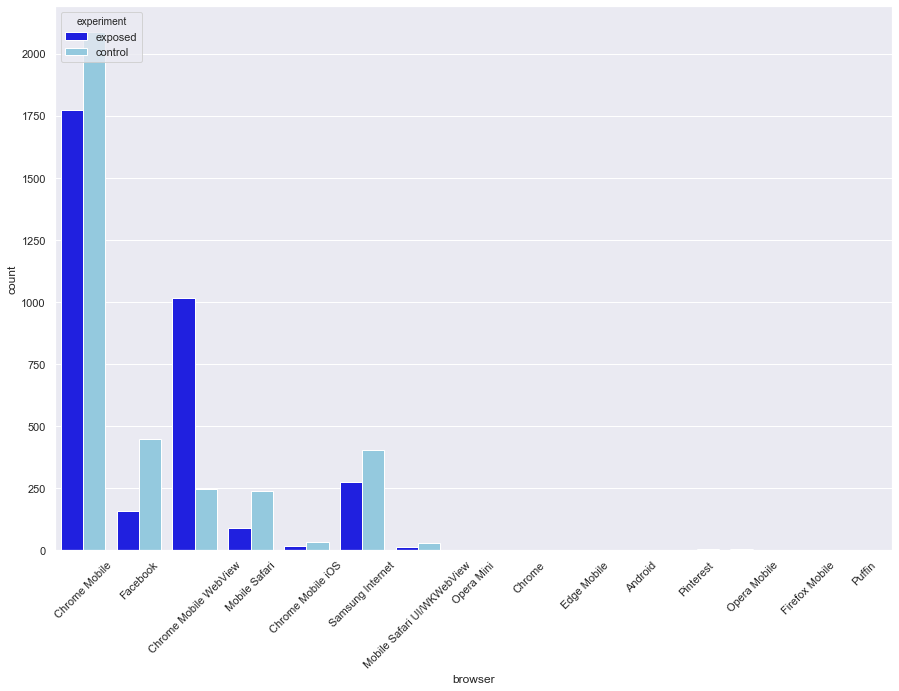

In [49]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="browser", palette=["blue", "skyblue"], data=non_response, hue='experiment')
plt.xticks(rotation=45)

Distribution of OS of respondents

(array([0, 1]), <a list of 2 Text xticklabel objects>)

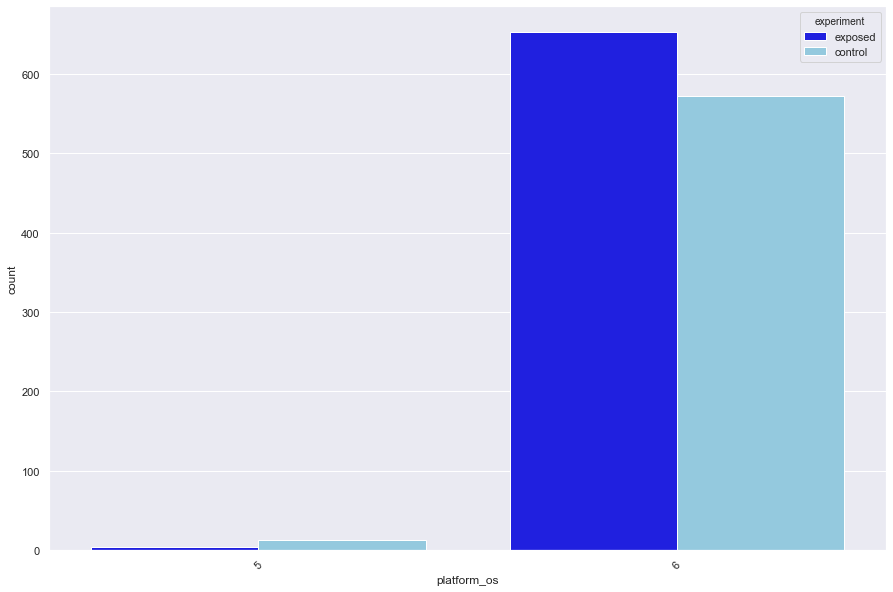

In [48]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="platform_os", palette=["blue", "skyblue"], data=response, hue='experiment')
plt.xticks(rotation=45)

Distribution of OS of non-respondents

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

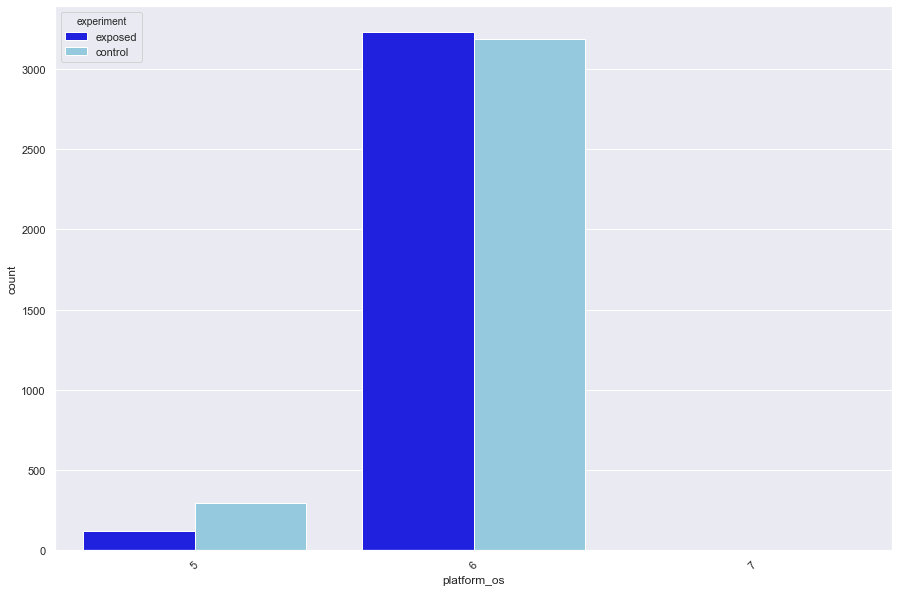

In [50]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="platform_os", palette=["blue", "skyblue"], data=non_response, hue='experiment')
plt.xticks(rotation=45)

Distribution of top 10 devices used by respondents

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

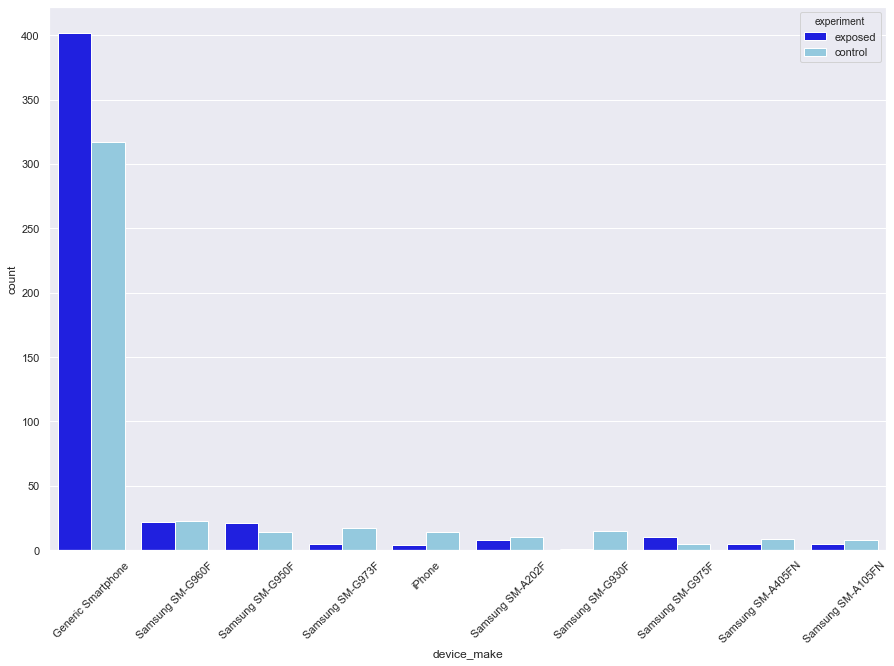

In [112]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="device_make", palette=["blue", "skyblue"], data=response, hue='experiment',order=response.device_make.value_counts().iloc[:10].index)
plt.xticks(rotation=45)

In [ ]:
#Distribution of device of non-respondents

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="device_make", palette=["blue", "skyblue"], data=non_response, hue='experiment')
plt.xticks(rotation=45)

# Univariate analysis based on whether an individual knows the brand

bar plot of day of the experiment
on every date the people who did not know the barand were more than those who knew, 
the date of the experimrnt did not influence the number of yes or no

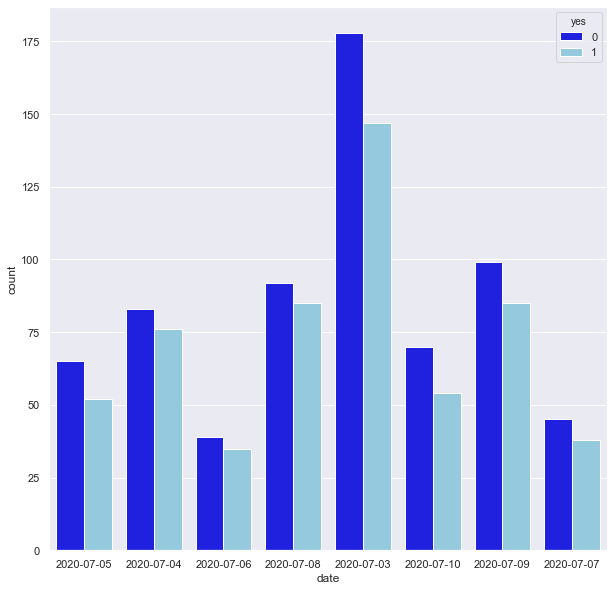

In [59]:
plt.figure(figsize=(10,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="date", palette=["blue", "skyblue"], data=response, hue='yes')

Text(0, 0.5, 'probability')

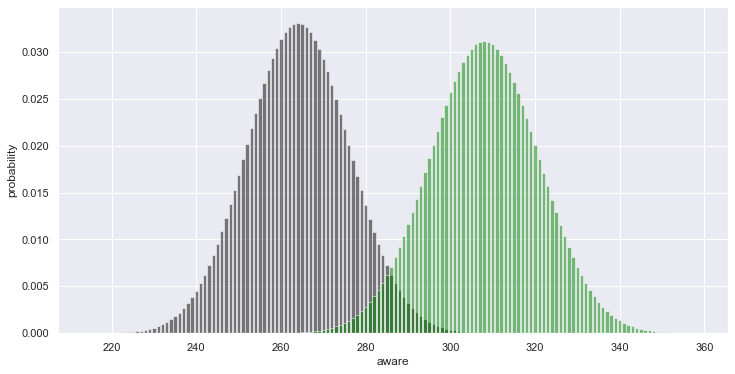

bar plot of hour of the experiment
to see if there are more people who said yes or no in a certain hour 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

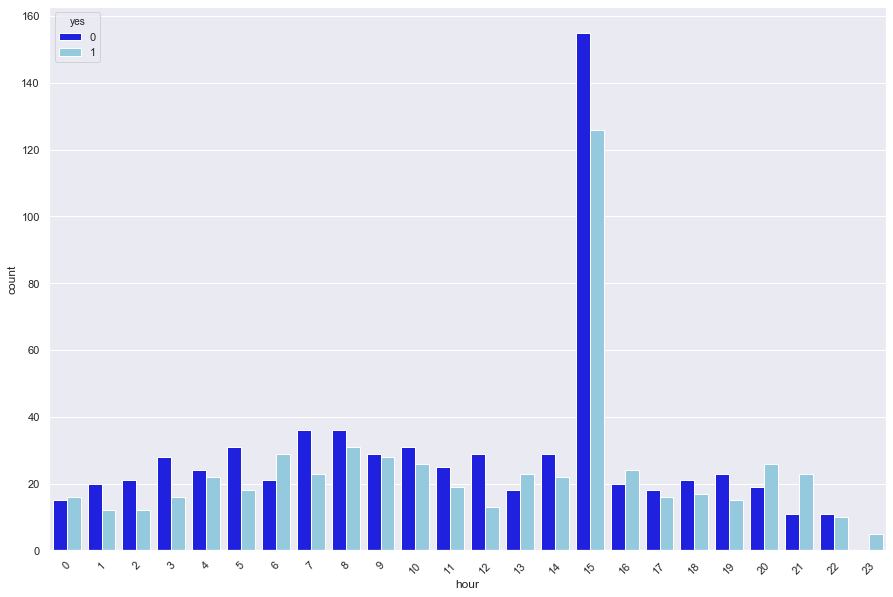

In [62]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="hour", palette=["blue", "skyblue"], data=response, hue='yes')
plt.xticks(rotation=45)

bar plot of OS used during the experiment
to see if there are more people who said yes or no in one platform compared to the other 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

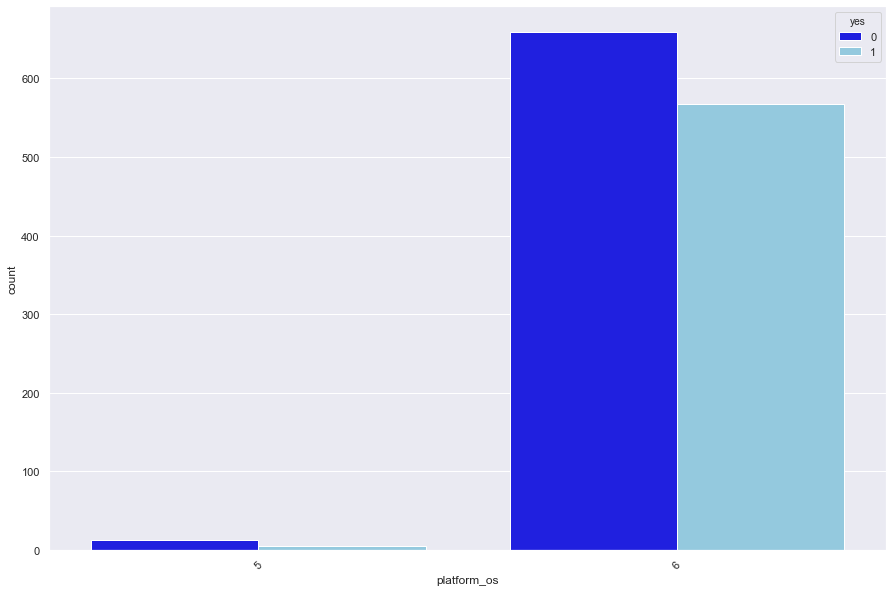

In [63]:
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="platform_os", palette=["blue", "skyblue"], data=response, hue='yes')
plt.xticks(rotation=45)

# CLASSICAL FREQUENTIST A/B TESTING

compare the distribution of the two groups using binomial distribution
the exposed group has more people who are aware of the lux brand compared to the control group

Text(0, 0.5, 'probability')

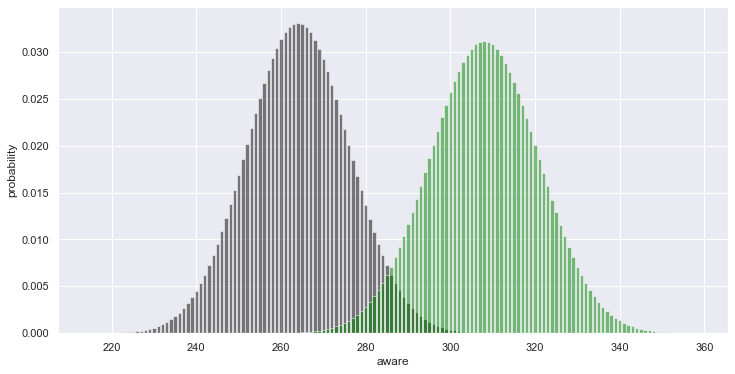

In [86]:
control_aware=control_data['yes'].sum()                   #no of people who are aware of lux in control group
control_total=len(control_data)                    #total number of people in the control group
exposed_aware=exposed_data['yes'].sum()                    #no of people who are aware of lux in exposed group
exposed_total=len(exposed_data)                    #total number of people in exposed group
p_control=control_aware/control_total                    #probability of being in control group
p_exposed=exposed_aware/exposed_total                    #probablity of being in exposed group
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(control_aware-49, control_aware+50, 100)
yA = scs.binom(control_total, p_control).pmf(xA)
ax.bar(xA, yA, alpha=0.5, color='black')
xB = np.linspace(exposed_aware-49, exposed_aware+50, 100)
yB = scs.binom(exposed_total, p_exposed).pmf(xB)
ax.bar(xB, yB, alpha=0.5,color='green')
plt.xlabel('aware')
plt.ylabel('probability')

In [ ]:
# control_aware=264                    #no of people who are aware of lux in control group
# control_total=586                    #total number of people in the control group
# exposed_aware=308
# exposed_total=657
# control_cr= 0.450512                   #proportion of yes for control group
# exposed_cr=0.468798                 #proportion of yes for experiment group
# fig, ax = plt.subplots(figsize=(12,6))
# x = np.linspace(control_aware-49, control_aware+50, 100)
# y = scs.binom(control_total, control_cr).pmf(x)
# ax.bar(x, y, alpha=0.5)
# ax.axvline(x=exposed_cr * control_total, c='blue', alpha=0.75, linestyle='--')
# plt.xlabel('aware_of_brand')
# plt.ylabel('probability')

A/B test based on conversion of the bernoulli parameter following a normal distribution
Below, we check if the difference between the conversions in the experiment group and that of the control group are 
statistically significant

In [107]:
baseline_rate = control_aware / control_total  #level of awareness in the control group
practical_significance = 0.02 #user defined, this is the amount of change we need to conclude that there is a difference between the groups
confidence_level = 0.05 #user defined, for a 95% confidence interval, this is the probability of type I error
sensitivity = 0.9 #user defined, this is the power of the test

In [108]:
#Calculate pooled probability
prob_pooled = (control_aware + exposed_aware) / (control_total + exposed_total)

Zero is contained in the interval below therefore based on the confidence interval, we fail to reject the null and conclude that 95% of the times the experiment is run, there is no impact from using the smart ad 

In [109]:
#Calculate pooled standard error and margin of error
se_pooled = math.sqrt(prob_pooled * (1 - prob_pooled) * (1 / control_total + 1 / exposed_total))
z_score = scs.norm.ppf(1 - confidence_level / 2)
margin_of_error = se_pooled * z_score

#Calculate dhat, the estimated difference between probability of awareness in the experiment and control groups
d_hat = (exposed_aware / exposed_total) - (control_aware / control_total)

#Test if we can reject the null hypothesis
lower_bound = d_hat - margin_of_error
upper_bound = d_hat + margin_of_error
print("The lower bound of the confidence interval is ", round(lower_bound * 100, 2), "%")
print("The upper bound of the confidence interval is ", round(upper_bound * 100, 2), "%")

The lower bound of the confidence interval is  -3.72 %
The upper bound of the confidence interval is  7.38 %


In [135]:
z_stat=(d_hat-prob_pooled)/se_pooled
z_stat

-15.603545958642218

Based on the lift, the lower boundary of the difference is less than the 0.05 difference in awareness that has been set here, we also end up concluding that there was no difference from using the smart ad as opposed to the dummy

In [110]:
if practical_significance < lower_bound:
    print("Reject null hypothesis")
else: 
    print("Do not reject the null hypothesis")

Do not reject the null hypothesis


Determine required sample size

In [111]:
effect_size = sm.stats.proportion_effectsize(baseline_rate, baseline_rate + practical_significance)
sample_size = sm.stats.NormalIndPower().solve_power(effect_size = effect_size, power = sensitivity, 
                                               alpha = confidence_level, ratio=1)
print("Required sample size: ", round(sample_size), " per group")

Required sample size:  13051  per group


The samples in each group are less than the minimum required sample size, the company needs to collect more responses or apply a bootstrap. A bootsrap will sample the original dataset with replacement to create new and unique datasets. It assumes that the original dataset is a fairly good reflection of the population as a whole so therefore sampling with replacement roughly simulates random sampling from the population. This will ensure that the null hypothesis is not randomly rejected and could also increase the size of the samples.

In [95]:
ab_summary

,yes,total,rate
experiment,,,
control,264,586,0.450512
exposed,308,657,0.468798


The classical A/B test has only taken into account the response column variables and ignored the other variable contained in the data

# SEQUENTIAL A/B TEST

Conditional Sequential Test

In [154]:
#@title
#REFERENCE
# A Conditional Sequential Test for the Equality of Two Binomial Proportions
# William Q. Meeker, Jr
# Journal of the Royal Statistical Society. Series C (Applied Statistics)
# Vol. 30, No. 2 (1981), pp. 109-115
class ConditionalSPRT:
    def __init__(self,x,y,t1,alpha=0.05,beta=0.10,stop=None):
        self.x=x
        self.y=y
        self.t1=t1
        self.alpha=alpha
        self.beta=beta
        self.stop=stop

        if t1<=1:
            printLog('warning',"Odd ratio should exceed 1.")
        if (alpha >0.5) | (beta >0.5):
            printLog('warning',"Unrealistic values of alpha or beta were passed."
                     +" You should have good reason to use large alpha & beta values")
        if stop!=None:
            stop=math.floor(n0)

    def comb(n, k):
        return math.factorial(n) // math.factorial(k) // math.factorial(n - k)

    def lchoose(b, j):
        a=[]
        if (type(j) is list) | (isinstance(j,np.ndarray)==True):
            if len(j)<2:
                j=j[0]
        if (type(j) is list) | (isinstance(j,np.ndarray)==True):
            for k in j:
                n=b
                if (0 <= k) & (k<= n):
                    a.append(math.log(comb(n,k)))
                else:
                    a.append(0)
        else:
            n=b
            k=j
            if (0 <= k) & (k<= n):
                a.append(math.log(comb(n,k)))
            else:
                a.append(0)

        return np.array(a)

    def g(x,r,n,t1,t0=1):
        return -math.log(h(x,r,n,t1))+math.log(h(x,r,n,t0))

    def h(x,r,n,t=1):
        return f(r,n,t,offset=ftermlog(x,r,n,t))

    def f(r,n,t,offset=0):
        upper=max(0,r-n)
        lower=min(n,r)
        rng=list(range(upper,lower+1))
        return np.sum(fterm(rng,r,n,t,offset))

    def fterm(j,r,n,t,offset=0):
        ftlog=ftermlog(j,r,n,t,offset)
        return np.array([math.exp(ex) for ex in ftlog])

    def ftermlog(j,r,n,t,offset=0):
        xx=r-j
        lch=lchoose(n,j)
        lchdiff=lchoose(n,xx)
        lg=np.array(j)*math.log(t)
        lgsum=lch+lchdiff
        lgsum2=lgsum+lg
        lgdiff=lgsum2-offset

        return lgdiff

    def logf(r,n,t,offset=0):

        z=f(r,n,t,offset)
        if z>0:
            return math.log(z)
        else:
            return np.nan

    def clowerUpper(r,n,t1c,t0=1,alpha=0.05,beta=0.10):
        offset=ftermlog(math.ceil(r/2),r,n,t1c)
        z=logf(r,n,t1c,logf(r,n,t0,offset)+offset)
        a=-math.log(alpha/(1-beta))
        b=math.log(beta/(1-alpha))
        lower=b
        upper=1+a
        return (np.array([lower,upper])+z)/math.log(t1c/t0)

        l=math.log(self.beta/(1-self.alpha))
        u=-math.log(self.alpha/(1-self.beta))
        sample_size=min(len(x),len(y))
        n=np.array(range(1,sample_size+1))

        if self.stop!=None:
            n=np.array([z for z in n if z<=stop])
        x1=np.cumsum(x[n-1])
        r=x1+np.cumsum(y[n-1])
        stats=np.array(list(map(g,x1, r, n, [t1]*len(x1)))) #recurcively calls g

        clu=list(map(clowerUpper,r,n,[t1]*len(r),[1]*len(r),[alpha]*len(r), [beta]*len(r)))
        limits=[]
        for v in clu:
            inArray=[]
            for vin in v:
                inArray.append(math.floor(vin))
            limits.append(np.array(inArray))
        limits=np.array(limits)

        k=np.where((stats>=u) | (stats<=l))
        cvalues=stats[k]
        if cvalues.shape[0]<1:
            k= np.nan
            outcome='Unable to conclude.Needs more sample.'
        else:
            k=np.min(k)
            if stats[k]>=u:
                outcome=f'Exposed group produced a statistically significant increase.'
            else:
                outcome='Their is no statistically significant difference between two test groups'
        if (stop!=None) & (k==np.nan):
            c1=clowerUpper(r,stop,t1,alpha,beta)
            c1=math.floor(np.mean(c1)-0.5)
            if x1[n0]<=c1:
                truncate_decision='h0'
                outcome='Maximum Limit Decision. The aproximate decision point shows their is no statistically significant difference between two test groups'
            else:
                truncate_decision='h1'
                outcome=f'Maximum Limit Decision. The aproximate decision point shows exposed group produced a statistically significant increase.'
            truncated=stop
        else:
            truncate_decision='Non'
            truncated=np.nan
        return outcome,n, k,l,u,truncated,truncate_decision,x1,r,stats,limits

In [156]:
 model=ConditionalSPRT(exposed_data['yes'],control_data['yes'],t1=2,alpha=0.05,beta=0.10,stop=None)

In [ ]:
model.comb()

In [ ]:
model.lchoose()

In [ ]:
model.g()

In [ ]:
model.h()

In [ ]:
model.f()

In [ ]:
model.fterm()

In [ ]:
model.ftermlog()

In [ ]:
model.logf()

In [ ]:
model.clowerUpper()

# SEQUENTIAL PROBABILITY RATIO TEST

In [ ]:
class SequentialTest:
  def __init__(self,exposed,control,alpha,beta):
    '''
    initialise startup variables
    '''
    self.exposed=exposed
    self.control=control
    self.alpha=alpha
    self.beta=beta
    
    
  
  def stoppingRule(self,p_exposed,p_control):
    '''
    This function should take current observation and return statistical decision made. 
    Consider truncate rule for longer tests
    '''

    a=np.log(self.beta/(1-self.alpha))
    b=np.log((1-self.beta)/self.alpha)
    S=0
    while a<S<b:
        control_aware=control_data['yes'].sum()                   #no of people who are aware of lux in control group
        control_total=len(control_data)                    #total number of people in the control group
        exposed_aware=exposed_data['yes'].sum()                    #no of people who are aware of lux in exposed group
        exposed_total=len(exposed_data)                    #total number of people in exposed group
        p_control=control_aware/control_total                    #probability of being in control group
        p_exposed=exposed_aware/exposed_total                    #probablity of being in exposed group
        llikelihood_exposed=np.log(scs.norm.pmf(exposed.yes,p_exposed)).sum()
        llikelihood_control=np.log(scs.norm.pmf(control.yes,p_control)).sum()
        lrt=llikelihood_control/llikelihood_exposed    
        S=+lrt
        
    if S>=b:
        return "Reject null hypothesis"
    if S<=a:
        return "Fail to reject null hypothesis"
   

  def computeBoundaries(self,):
    '''
    This function shoud compute boundaries 
    '''

  def plotTest(self,):
    '''
    showing the cumulative statistical test (e.g., log probability ratio) and the uper and lower limits.
    '''

  def plotBoundaries(self,):
    '''cumulative sums of exposed successes, bounded by the critical limits.
    '''


In [ ]:
def transform_data(df):
  '''
  segment data into exposed and control groups
  consider that SmartAd runs the experment hourly, group data into hours. 
      Hint: create new column to hold date+hour and use df.column.map(lambda x:  pd.Timestamp(x,tz=None).strftime('%Y-%m-%d:%H'))
  create two dataframes with bernouli series 1 for posetive(yes) and 0 for negative(no)
    Hint: Given engagement(sum of yes and no until current observation as an array) and success (yes countas an array), the method generates random binomial distribution
        #Example
           engagement = np.array([5, 3, 3])
           yes = np.array([2, 0, 3])       
         Output is "[1] 1 0 1 0 0 0 0 0 1 1 1", showing a binary array of 5+3+3 values
         of which 2 of the first 5 are ones, 0 of the next 3 are ones, and all 3 of
         the last 3 are ones where position the ones is randomly distributed within each group.
  '''
  return exposed,control

def plotDataSummary(exposed, control):
  'This function plots cummulated success'

def pretyPrintTestResult(self, test):
  '''This function print final test result. Json format is recommended. For example
  {
    "name": "",
    "engagementCountControl": ,
    "engagementCountExposed": ,
    "positiveCountControl": ,
    "positiveCountExposed": ,
    "ControlSuccessProbability": ,
    "ExposedSuccessProbability": ,
    "basePositiveRate": ,
    "significanceSign": ".",
    "lift": ,
    "oddRatio": ,
    "exactSuccessOddRate":,
    "confidenceIntervalLevel": ,
    "alpha": ,
    "beta": ,
    "power": ,
    "criticalValue": ,
    "lower critical(a)": 
    "upper critical(b)": ,
    "TotalObservation": 
  }'''

In [ ]:
######################################
'Define statistical parameters such as alpha, beta, sample size if evan approach is used, odd ratio for SPRT'
alpha=
beta=
#other variables here
'Compute statistical lower and upper decision points such as a and b'
a=
b=
#other variables here

##data processing here
exposed,control=transform_data(data)
##plot data summary
plotDataSummary(exposed,control)

'Perform test. Loop over each of data entry and perform test. Accumulate result into dataframe and print out test journey'
test=SequentialTest(...)

'Print test result.'
pretyPrintTestResult(resultObject)